In [1]:
from qiskit import*
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit.providers.aer import QasmSimulator


In [2]:
qr = QuantumRegister(10) # quantum bit register
cr = ClassicalRegister(10) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)


In [3]:
circuit.draw()

┌───┐┌─┐                           
 q0_0: ┤ H ├┤M├───────────────────────────
       ├───┤└╥┘┌─┐                        
 q0_1: ┤ H ├─╫─┤M├────────────────────────
       ├───┤ ║ └╥┘┌─┐                     
 q0_2: ┤ H ├─╫──╫─┤M├─────────────────────
       ├───┤ ║  ║ └╥┘┌─┐                  
 q0_3: ┤ H ├─╫──╫──╫─┤M├──────────────────
       ├───┤ ║  ║  ║ └╥┘┌─┐               
 q0_4: ┤ H ├─╫──╫──╫──╫─┤M├───────────────
       ├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q0_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
       ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q0_6: ┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
       ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q0_7: ┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
       ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q0_8: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
       ├───┤ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q0_9: ┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
       └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c0: 10/══════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
             0  1  2  3  4  5  6  7  8  9

In [4]:
from qiskit.tools.visualization import plot_histogram
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024, memory=True).result()
# get all experiments (number of shots)
raw_data = result.get_memory()
print(raw_data)

['0100100110', '0110111111', '0111101110', '1011101010', '0101110010', '0001001101', '0011001111', '1101110100', '1011010010', '1111101001', '0001110001', '1000110100', '0100001000', '1001010011', '0010101000', '0010011010', '0110111001', '0100010110', '1010010000', '1111100010', '0000011000', '0101100011', '1100000101', '1011111010', '1101010100', '0110000110', '1101111101', '0010001011', '0001101011', '0001101010', '1011000110', '0001011111', '1010101101', '1101001001', '1100001011', '1101010001', '1101001011', '0011010110', '0011101001', '1100001100', '1010101010', '0011011001', '0001010010', '0000011001', '0110001100', '1001110010', '1111011010', '0111011111', '1111001010', '1011000110', '1110010011', '0110011101', '0010010010', '0100010011', '1101000010', '0101110001', '0001100000', '1110010111', '0011101000', '1110011000', '0001111010', '0000010101', '0000111001', '0111110001', '1100100001', '1111001111', '0101101101', '0000101011', '1100110000', '1100010111', '0001110101', '1111

In [5]:
counts = result.get_counts()
print(counts)

{'1100110111': 1, '1011010111': 1, '1100001011': 2, '1011000110': 2, '0010101000': 3, '1101011010': 3, '1010111010': 1, '0000000001': 2, '0011001111': 3, '0100001000': 2, '0110111111': 2, '1000101001': 1, '1111101001': 1, '0100100110': 1, '0111101110': 2, '1111100100': 2, '1011101010': 2, '1000010111': 2, '1111110111': 1, '0000111001': 3, '0101001100': 1, '1011001001': 1, '1101001001': 1, '1101110100': 1, '0101110010': 2, '0001001101': 1, '0100010000': 2, '0001110001': 2, '1110011111': 1, '1011010010': 2, '0010011110': 1, '1100110010': 2, '1100111110': 1, '0010010010': 1, '1001011111': 3, '0110101010': 1, '1000110100': 3, '1000111010': 1, '1110110011': 1, '1111011010': 3, '1001010011': 3, '0110100100': 1, '1100110110': 2, '1100001100': 3, '0010011010': 1, '1100000101': 3, '0110111001': 2, '1001000000': 1, '1101010100': 2, '0101001001': 1, '0000001101': 1, '1010110100': 1, '0100010110': 2, '0001001011': 1, '1001110010': 2, '1010001100': 2, '1010010000': 1, '1111100010': 3, '0000011000':

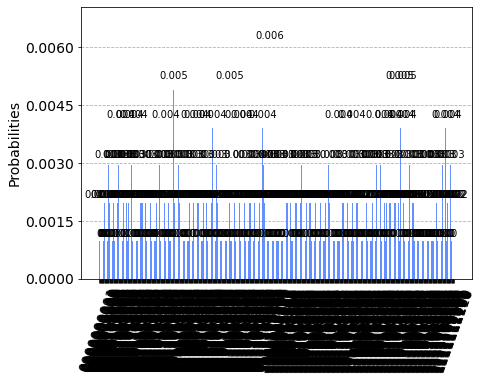

In [6]:
plot_histogram(counts)